Measurement outcomes: {'111': 1024}
Original Circuit:
Transpiled Circuit:


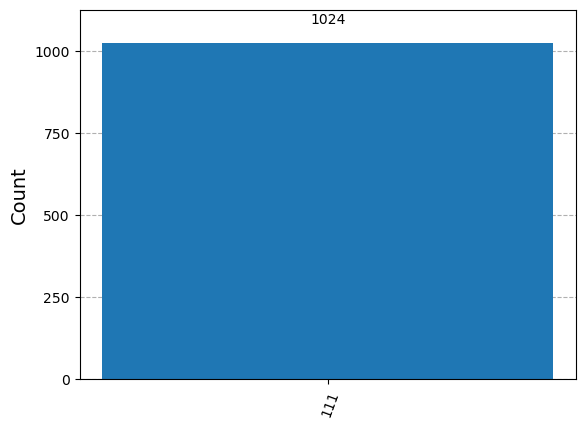

In [6]:
# from qiskit import QuantumCircuit, execute
import qiskit
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

# Function to implement the oracle for a constant or balanced function
def deutsch_jozsa_oracle(qc, n, oracle_type):
    """Implements the oracle for Deutsch-Josza Algorithm.
    Arguments:
    - qc: QuantumCircuit
    - n: Number of qubits for input
    - oracle_type: 'constant' or 'balanced'
    """
    if oracle_type == 'constant':
        # Constant function: Flip the output qubit if the function is 1
        qc.x(n)  # Flip the output qubit for constant-1
    elif oracle_type == 'balanced':
        # Balanced function: Apply CNOT gates to flip output based on input
        for i in range(n):
            qc.cx(i, n)

# Define the Deutsch-Josza Algorithm
def deutsch_jozsa_algorithm(n, oracle_type):
    """Runs Deutsch-Josza Algorithm.
    Arguments:
    - n: Number of input qubits
    - oracle_type: 'constant' or 'balanced'
    Returns:
    - result: Counts of measurement outcomes
    """
    # Create a QuantumCircuit with n input qubits and 1 output qubit
    qc = QuantumCircuit(n + 1, n)

    # Initialize the output qubit to |1>
    qc.x(n)
    qc.h(n)

    # Apply Hadamard gates to the input qubits
    for i in range(n):
        qc.h(i)

    # Apply the oracle
    deutsch_jozsa_oracle(qc, n, oracle_type)

    # Apply Hadamard gates to the input qubits again
    for i in range(n):
        qc.h(i)

    # Measure the input qubits
    qc.measure(range(n), range(n))

    # Simulate the circuit
    simulator = Aer.get_backend('aer_simulator')
    
    # Transpile the circuit
    transpiled_circuit = transpile(qc, simulator)
    
    # Run the transpiled circuit directly using the simulator's `run` method
    result = simulator.run(transpiled_circuit, shots=1024).result()

    return result.get_counts(), qc, transpiled_circuit

# Run the algorithm
n = 3  # Number of input qubits
oracle_type = 'balanced'  # Change to 'constant' for a constant function
counts, original_qc, transpiled_qc = deutsch_jozsa_algorithm(n, oracle_type)

# Display the results
print("Measurement outcomes:", counts)
print("Original Circuit:")
original_qc.draw('mpl')  # Draw the original circuit
print("Transpiled Circuit:")
transpiled_qc.draw('mpl')  # Draw the transpiled circuit
plot_histogram(counts)
